In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

sns.set_theme(style="white")
sns.set(rc={'figure.figsize':(11.7,8.27)})

from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

In [2]:
df = pd.read_parquet('../data/raw/syntetic-1.prq').reset_index().drop(columns=['index'])
df

,height,weight,shoe_size,model
0,166.981552,70.588052,41,normal
1,160.589239,61.959307,39,normal
2,156.126060,65.191916,38,normal
3,168.328458,68.912309,40,normal
4,176.746966,65.827840,40,normal
...,...,...,...,...
100095,170.712094,64.452416,41,anomaly
100096,171.405340,67.654000,38,anomaly
100097,172.920991,79.764061,39,anomaly
100098,165.588889,79.819488,40,anomaly


# PCA

In [3]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [4]:
pipeline = Pipeline([('scaling', Normalizer()),
                     ('pca', PCA(n_components=2))])


In [5]:
pipeline.fit(df[['height', 'shoe_size', 'weight']])

Pipeline(steps=[('scaling', Normalizer()), ('pca', PCA(n_components=2))])

In [6]:
pipeline['pca'].explained_variance_ratio_

array([0.96072358, 0.03861808])

In [7]:
pipeline['pca'].explained_variance_ratio_.sum()

0.9993416659537989

In [8]:
pca_components = pipeline.transform(df[['height', 'shoe_size', 'weight']])

In [9]:
pc_df = pd.concat([df, pd.DataFrame(pca_components, columns=['pc1', 'pc2'])], axis=1)
pc_df

,height,weight,shoe_size,model,outlier,pc1,pc2
0,166.981552,70.588052,41,normal,False,0.015471,0.004829
1,160.589239,61.959307,39,normal,False,0.045978,-0.000240
2,156.126060,65.191916,38,normal,False,0.019421,0.002600
3,168.328458,68.912309,40,normal,False,0.025324,-0.003006
4,176.746966,65.827840,40,normal,False,0.054845,-0.015826
...,...,...,...,...,...,...,...
100095,170.712094,64.452416,41,anomaly,False,0.052601,-0.003221
100096,171.405340,67.654000,38,anomaly,False,0.035182,-0.018083
100097,172.920991,79.764061,39,anomaly,False,-0.019255,-0.009457
100098,165.588889,79.819488,40,anomaly,False,-0.033257,0.005710


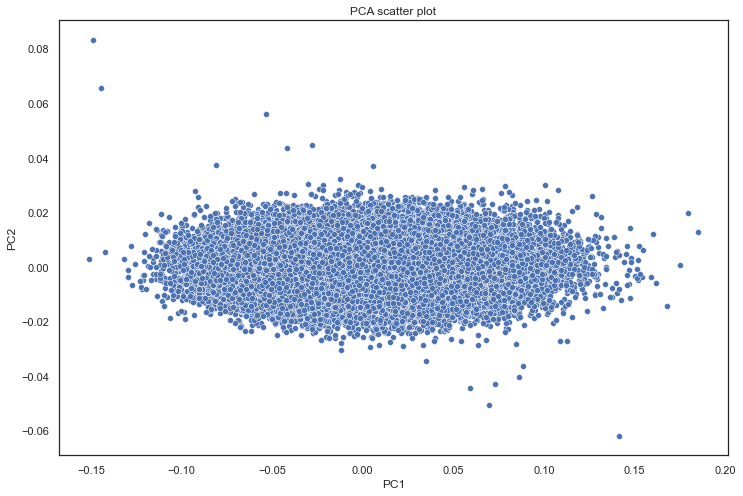

In [28]:
sns.set_theme(style="white")
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns_plot = sns.scatterplot(data=pc_df, x='pc1', y="pc2",  ax=ax)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'PCA scatter plot')

sns_plot.figure.savefig("pca-1.png", pad_inches=0,  bbox_inches=None, dpi=150)

# K means

In [63]:
from sklearn.cluster import KMeans

In [77]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df[['height', 'shoe_size', 'weight']])
kmeans_df = df.copy()
kmeans_df['labels'] = kmeans.labels_
kmeans_df

,height,weight,shoe_size,model,outlier,labels
0,166.981552,70.588052,41,normal,False,2
1,160.589239,61.959307,39,normal,False,1
2,156.126060,65.191916,38,normal,False,1
3,168.328458,68.912309,40,normal,False,2
4,176.746966,65.827840,40,normal,False,2
...,...,...,...,...,...,...
100095,170.712094,64.452416,41,anomaly,False,1
100096,171.405340,67.654000,38,anomaly,False,2
100097,172.920991,79.764061,39,anomaly,False,2
100098,165.588889,79.819488,40,anomaly,False,2


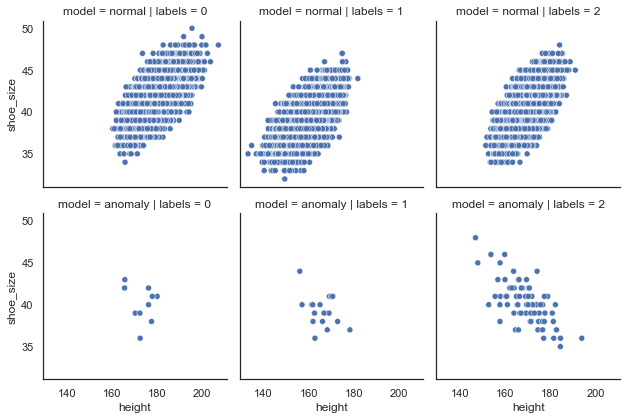

In [76]:
g = sns.FacetGrid(kmeans_df, col="labels", row='model')
g.map(sns.scatterplot, "height", 'shoe_size', 'model')


-----

In [80]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(pc_df[['pc1', 'pc2',]])
pc_df['km_cluster'] = kmeans.labels_
pc_df

,height,weight,shoe_size,model,outlier,pc1,pc2,km_cluster
0,166.981552,70.588052,41,normal,False,0.015471,0.004829,0
1,160.589239,61.959307,39,normal,False,0.045978,-0.000240,0
2,156.126060,65.191916,38,normal,False,0.019421,0.002600,0
3,168.328458,68.912309,40,normal,False,0.025324,-0.003006,0
4,176.746966,65.827840,40,normal,False,0.054845,-0.015826,0
...,...,...,...,...,...,...,...,...
100095,170.712094,64.452416,41,anomaly,False,0.052601,-0.003221,0
100096,171.405340,67.654000,38,anomaly,False,0.035182,-0.018083,0
100097,172.920991,79.764061,39,anomaly,False,-0.019255,-0.009457,1
100098,165.588889,79.819488,40,anomaly,False,-0.033257,0.005710,1


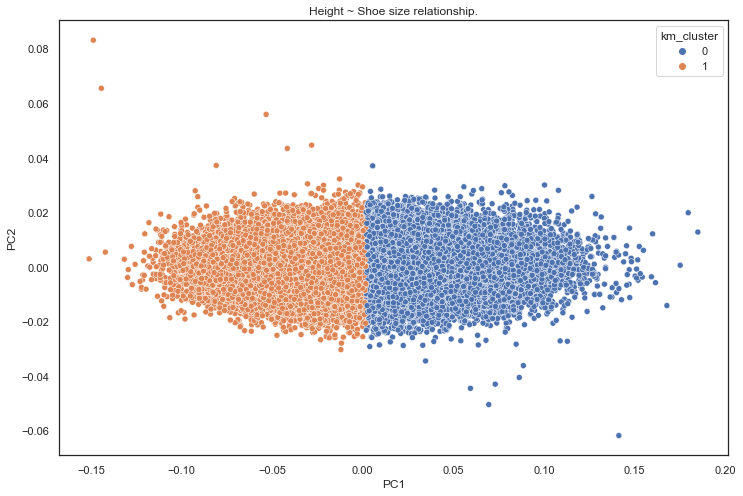

In [81]:
sns.set_theme(style="white")
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns_plot = sns.scatterplot(data=pc_df, x='pc1', y="pc2", hue="km_cluster", ax=ax)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Height ~ Shoe size relationship.')

sns_plot.figure.savefig("pca-kmeans.png", pad_inches=0,  bbox_inches=None,)

# DBSCAN

In [38]:
from sklearn.cluster import DBSCAN

In [39]:
db = DBSCAN(eps=0.01, min_samples=100).fit(pc_df[['pc1', 'pc2',]])

In [40]:
pc_df['db_cluster'] = db.labels_
pc_df

,height,weight,shoe_size,model,outlier,pc1,pc2
0,166.981552,70.588052,41,normal,False,0.015471,0.004829
1,160.589239,61.959307,39,normal,False,0.045978,-0.000240
2,156.126060,65.191916,38,normal,False,0.019421,0.002600
3,168.328458,68.912309,40,normal,False,0.025324,-0.003006
4,176.746966,65.827840,40,normal,False,0.054845,-0.015826
...,...,...,...,...,...,...,...
100095,170.712094,64.452416,41,anomaly,False,0.052601,-0.003221
100096,171.405340,67.654000,38,anomaly,False,0.035182,-0.018083
100097,172.920991,79.764061,39,anomaly,False,-0.019255,-0.009457
100098,165.588889,79.819488,40,anomaly,False,-0.033257,0.005710


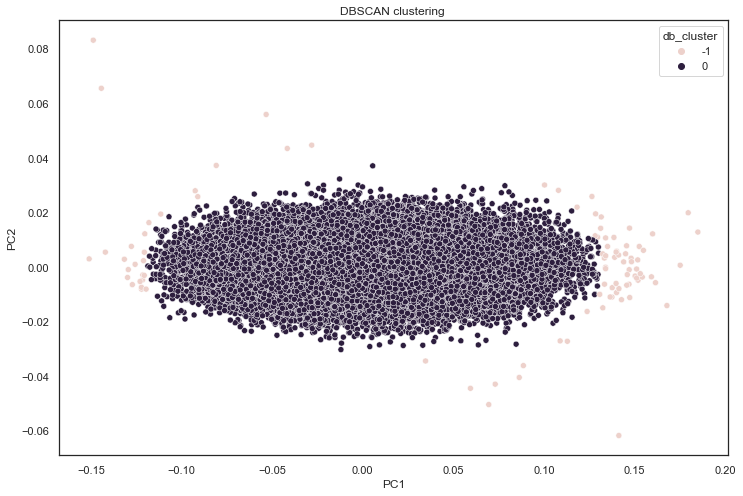

In [15]:
sns.set_theme(style="white")
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns_plot = sns.scatterplot(data=pc_df, x='pc1', y="pc2", hue="db_cluster", ax=ax)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'DBSCAN clustering; eps={db.get_params()["eps"]} ')

Text(0.5, 1.0, 'DBSCAN clustering; eps=0.02 ')

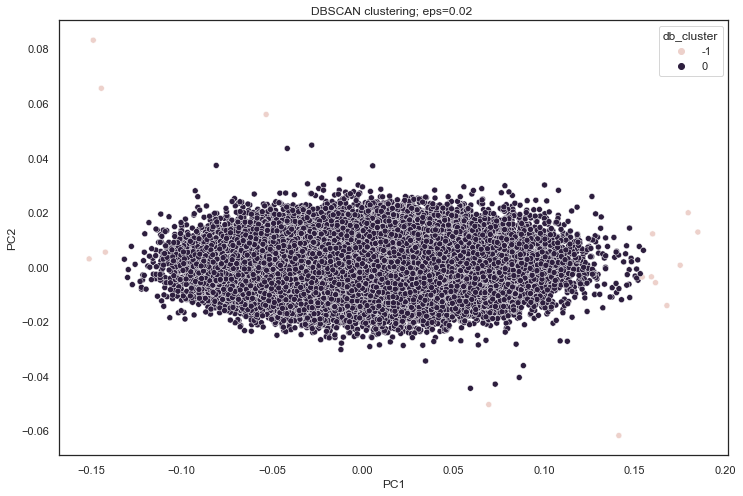

In [22]:
db = DBSCAN(eps=0.02, min_samples=100).fit(pc_df[['pc1', 'pc2',]])
pc_df['db_cluster'] = db.labels_

sns.set_theme(style="white")
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns_plot = sns.scatterplot(data=pc_df, x='pc1', y="pc2", hue="db_cluster", ax=ax)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'DBSCAN clustering; eps={db.get_params()["eps"]} ')

Text(0.5, 1.0, 'DBSCAN clustering; eps=0.015')

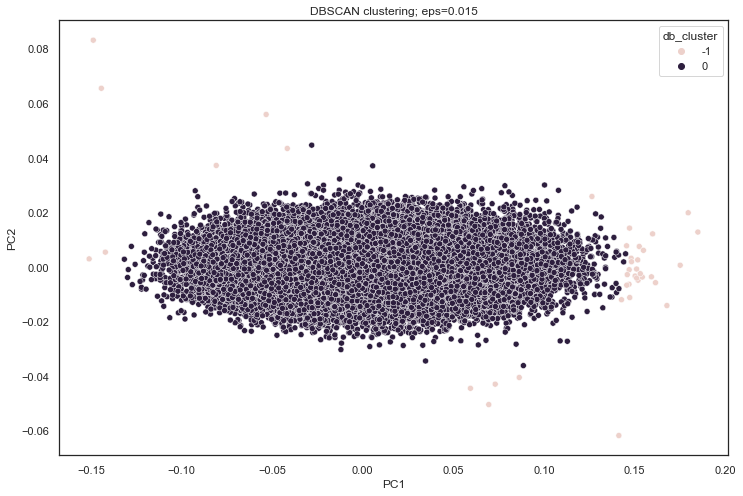

In [41]:
db = DBSCAN(eps=0.015, min_samples=100).fit(pc_df[['pc1', 'pc2',]])
pc_df['db_cluster'] = db.labels_

sns.set_theme(style="white")
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns_plot = sns.scatterplot(data=pc_df, x='pc1', y="pc2", hue="db_cluster", ax=ax)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'DBSCAN clustering; eps={db.get_params()["eps"]}')

In [42]:
sns_plot.figure.savefig("pca-dbscan.png", pad_inches=0,  bbox_inches=None, dpi=150)

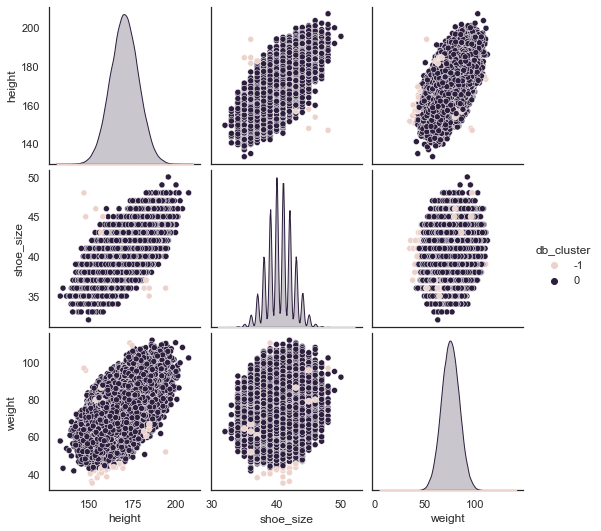

In [44]:
sns_plot = sns.pairplot(pc_df[['height', 'shoe_size', 'weight',"db_cluster"]], hue="db_cluster")
sns_plot.savefig("pca-dbscan-pairplot.png", pad_inches=0,  bbox_inches=None, dpi=150)

In [52]:
pc_df[(pc_df.db_cluster <0) ][['height', 'shoe_size', 'weight',"db_cluster"]].shape

(39, 4)

# alibi_detect

## Mahalanobis Distance

In [13]:
alibi_df = df.copy()
alibi_df

,height,weight,shoe_size,model,outlier
0,166.981552,70.588052,41,normal,False
1,160.589239,61.959307,39,normal,False
2,156.126060,65.191916,38,normal,False
3,168.328458,68.912309,40,normal,False
4,176.746966,65.827840,40,normal,False
...,...,...,...,...,...
100095,170.712094,64.452416,41,anomaly,False
100096,171.405340,67.654000,38,anomaly,False
100097,172.920991,79.764061,39,anomaly,False
100098,165.588889,79.819488,40,anomaly,False


In [14]:
from alibi_detect.od import Mahalanobis
np.random.seed(233)

od = Mahalanobis(
    threshold=10.,
    n_components=2,
    std_clip=3,
    start_clip=100,
    cat_vars={'model': 2}
).fit(
    alibi_df,
    d_type='abdm',
    disc_perc=[25, 50, 75]
)


TypeError: '(slice(None, None, None), 0)' is an invalid key

In [ ]:
alibi_df['mahalanobis'] = od.predict(
    df[['height', 'shoe_size', 'weight']],
    return_instance_score=True
)

## Isolation Forest

In [15]:
from alibi_detect.od import IForest

od = IForest(
    threshold=0.,
    n_estimators=100
)
od.fit(
    alibi_df[['height', 'shoe_size', 'weight']]
)

In [34]:
od.infer_threshold(
    alibi_df[['height', 'shoe_size', 'weight']],
    threshold_perc=99.9
)

In [35]:
scores =  od.predict(
    alibi_df[['height', 'shoe_size', 'weight']],
    return_instance_score=True
)
scores

{'data': {'instance_score': array([-0.08829711, -0.03109498,  0.00718229, ..., -0.06614776,
         -0.0843019 ,  0.08980018]),
  'feature_score': None,
  'is_outlier': array([0, 0, 0, ..., 0, 0, 0])},
 'meta': {'name': 'IForest',
  'detector_type': 'offline',
  'data_type': 'tabular'}}

In [36]:
alibi_df['isolation_forest'] = scores['data']['is_outlier']
alibi_df

,height,weight,shoe_size,model,outlier,isolation_forest
0,166.981552,70.588052,41,normal,False,0
1,160.589239,61.959307,39,normal,False,0
2,156.126060,65.191916,38,normal,False,0
3,168.328458,68.912309,40,normal,False,0
4,176.746966,65.827840,40,normal,False,0
...,...,...,...,...,...,...
100095,170.712094,64.452416,41,anomaly,False,0
100096,171.405340,67.654000,38,anomaly,False,0
100097,172.920991,79.764061,39,anomaly,False,0
100098,165.588889,79.819488,40,anomaly,False,0


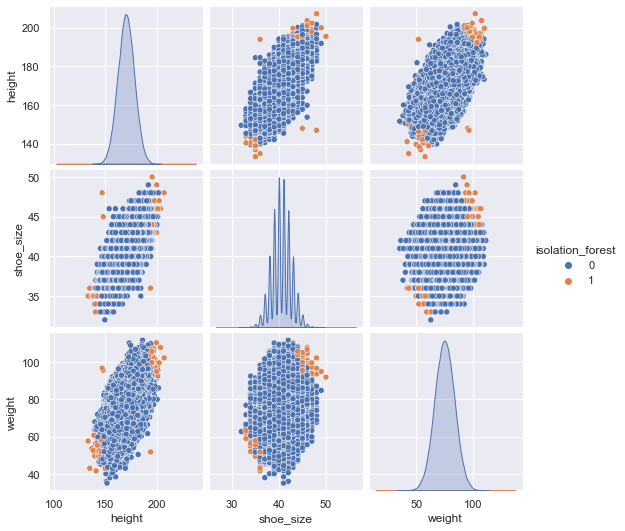

In [37]:
sns.pairplot(alibi_df[['height', 'shoe_size', 'weight',"isolation_forest"]], hue="isolation_forest")